# Data Cleaning and Rating of User Applications

In [2]:
import pandas as pd

In [3]:
applications_df = pd.read_csv('applications(2.0).csv')
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


>1. В ноутбуці завантаж таблицю з файлу applications.csv в Pandas DataFrame та почисти дані:
><ul>
><li>Прибери дублікати applicant_id</li>
><li>В полі 'External Rating' заповни відсутні значення нулями</li>
><li>В полі 'Education level' заповни відсутні значення текстом “Середня”</li>

></ul>


In [5]:
applications_df = applications_df.drop_duplicates(subset=['applicant_id'])


In [6]:
applications_df['External Rating'] = applications_df['External Rating'].fillna(0)

applications_df['Education level'] = applications_df['Education level'].fillna("Середня")


>2. Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.

In [8]:
industries_df = pd.read_csv('industries(2.0).csv')
industries_df.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [9]:
applications_df.columns

Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id'],
      dtype='object')

In [10]:
industries_df.columns

Index(['Industry', 'Score'], dtype='object')

In [11]:
applications_df = applications_df.merge(industries_df[['Industry', 'Score']], on='Industry', how='left', suffixes=('', '_industry'))

>3. Розрахуй рейтинг заявки за наступними умовами:
><ul>
><li>Рейтинг має бути числом від 0 до 100</li>
><li>Рейтинг - сума оцінок заявки по 6 критеріям.</li>
><li>Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю.</li>
></ul>

In [13]:
applications_df['Rating'] = 0

applications_df['Rating'] += ((applications_df['Age'] >= 35) & (applications_df['Age'] <= 55)) * 20
applications_df['Rating'] += (applications_df['Applied at'].apply(pd.to_datetime).dt.weekday < 5) * 20  # Перевірка, що подача не у вихідні
applications_df['Rating'] += (applications_df['Marital status'] == 'Одружений') * 20
applications_df['Rating'] += (applications_df['Location'].str.contains('Київ|область')) * 10
applications_df['Rating'] += applications_df['Score'].fillna(0)
applications_df['Rating'] += (applications_df['External Rating'] >= 7) * 20
applications_df['Rating'] -= (applications_df['External Rating'] <= 2) * 20

applications_df.loc[(applications_df['Amount'].isna()) | (applications_df['External Rating'] == 0), 'Rating'] = 0


>4. В результуючій таблиці залиш лише заявки з рейтингом більше нуля, ці заявки вважатимуться прийнятими.

In [15]:
accepted_applications_df = applications_df[applications_df['Rating'] > 0]

>5. Дані з результуючої таблиці згрупуй за тижнем подачі заявки, та виведи середній рейтинг прийнятих заявок у кожен тиждень.

In [24]:
accepted_applications_df['Applied at'] = pd.to_datetime(accepted_applications_df['Applied at'], format='%d.%m.%Y %H:%M', errors='coerce')
accepted_applications_df['Week'] = accepted_applications_df['Applied at'].dt.isocalendar().week

weekly_avg_rating = accepted_applications_df.groupby('Week')['Rating'].mean().reset_index()

print(weekly_avg_rating)

    Week     Rating
0      2  51.180782
1      5  48.555556
2      6  49.637931
3      9  49.381443
4     10  29.829424
5     13  43.966667
6     15     29.625
7     18  48.954545
8     19   45.26873
9     22  48.458647
10    23  45.845697
11    26  24.705882
12    28  46.582347
13    31      26.25
14    32  44.982729
15    35       49.0
16    37  44.105505
17    41  26.968085
18    45  31.104651
19    50  46.853865
20    52       35.5


C:\Users\User\AppData\Local\Temp\ipykernel_14624\1160962340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_applications_df['Applied at'] = pd.to_datetime(accepted_applications_df['Applied at'], format='%d.%m.%Y %H:%M', errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_14624\1160962340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_applications_df['Week'] = accepted_applications_df['Applied at'].dt.isocalendar().week


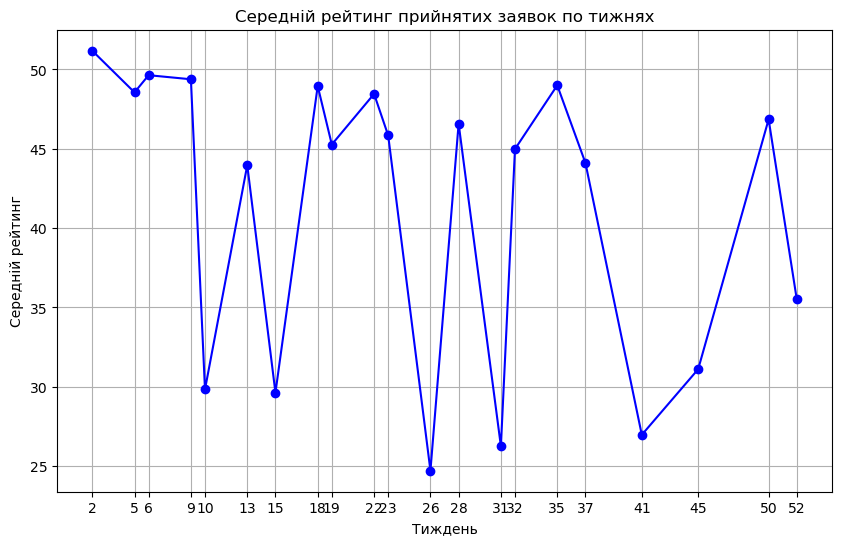

In [26]:
import matplotlib.pyplot as plt

# Побудова графіка середнього рейтингу прийнятих заявок по тижнях
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_rating['Week'], weekly_avg_rating['Rating'], marker='o', color='b', linestyle='-')
plt.title("Середній рейтинг прийнятих заявок по тижнях")
plt.xlabel("Тиждень")
plt.ylabel("Середній рейтинг")
plt.grid(True)
plt.xticks(weekly_avg_rating['Week'])
plt.show()


In [30]:
accepted_applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,Week
0,NaT,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,50,<NA>
2,NaT,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40,<NA>
4,NaT,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,45,<NA>
5,NaT,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65,<NA>
6,NaT,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,15,<NA>


In [32]:
accepted_applications_df.tail()


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,Week
13271,2023-09-01 03:41:00,16500.0,33,Чоловік,E-commerce,Married,10.0,Дві вищі,Харків чи область,f7ad9effd852b2f8d59c7c94218aee3d,15,65,35
13272,2023-09-01 10:14:00,3000.0,28,Чоловік,Інша,Single,5.0,Середня,Київ чи область,d8934c4bd85253bb2a21405c491d720b,10,40,35
13273,2023-09-01 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,45,35
13275,2023-09-01 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,30,35
13276,2023-09-01 11:28:00,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15,65,35
